# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

# Reading DataSet

In [2]:
df=pd.read_csv("D:\Data Analysis & Python\Project Datasets\SaYoPillow.csv")
df.sample(5)

,snoring rate,respiration rate,body temperature,limb movement,blood oxygen,eye movement,sleeping hours,heart rate,stress level
271,99.040,29.040,88.800,18.520,86.560,103.80,0.000,82.60,4
552,64.800,20.480,92.480,10.480,90.480,87.40,2.720,61.20,2
189,72.480,21.248,93.248,11.248,91.248,91.24,3.872,63.12,2
596,98.976,28.976,88.720,18.488,86.464,103.72,0.000,82.44,4
368,58.960,19.792,95.792,9.792,94.688,84.48,6.792,59.48,1


In [3]:
df.shape

(630, 9)

# Data Cleaning

## Statistical Summary

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
snoring rate,630.0,71.6,19.372833,45.0,52.50,70.0,91.25,100.0
respiration rate,630.0,21.8,3.966111,16.0,18.50,21.0,25.00,30.0
body temperature,630.0,92.8,3.529690,85.0,90.50,93.0,95.50,99.0
limb movement,630.0,11.7,4.299629,4.0,8.50,11.0,15.75,19.0
blood oxygen,630.0,90.9,3.902483,82.0,88.50,91.0,94.25,97.0
eye movement,630.0,88.5,11.893747,60.0,81.25,90.0,98.75,105.0
sleeping hours,630.0,3.7,3.054572,0.0,0.50,3.5,6.50,9.0
heart rate,630.0,64.5,9.915277,50.0,56.25,62.5,72.50,85.0
stress level,630.0,2.0,1.415337,0.0,1.00,2.0,3.00,4.0


### Missing Data

In [5]:
df.isna().sum().sort_values()

snoring rate        0
respiration rate    0
body temperature    0
limb movement       0
blood oxygen        0
eye movement        0
sleeping hours      0
heart rate          0
stress level        0
dtype: int64

The data here is free of missing data

### Outliers

In [6]:
df.columns

Index(['snoring rate', 'respiration rate', 'body temperature', 'limb movement',
       'blood oxygen', 'eye movement', 'sleeping hours', 'heart rate',
       'stress level'],
      dtype='object')

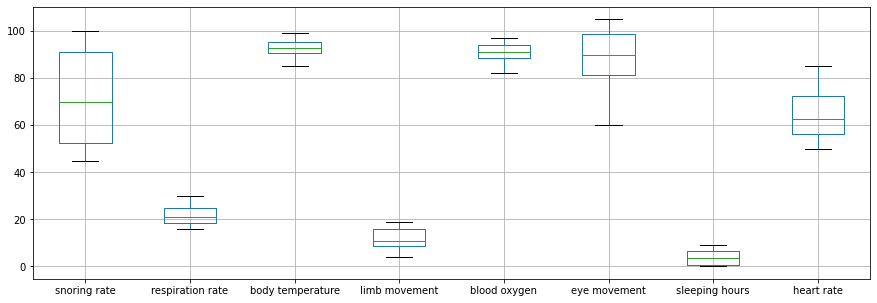

In [7]:
boxplot = df.boxplot(column=['snoring rate', 'respiration rate', 'body temperature', 'limb movement',
       'blood oxygen', 'eye movement', 'sleeping hours', 'heart rate'],figsize=(15,5))

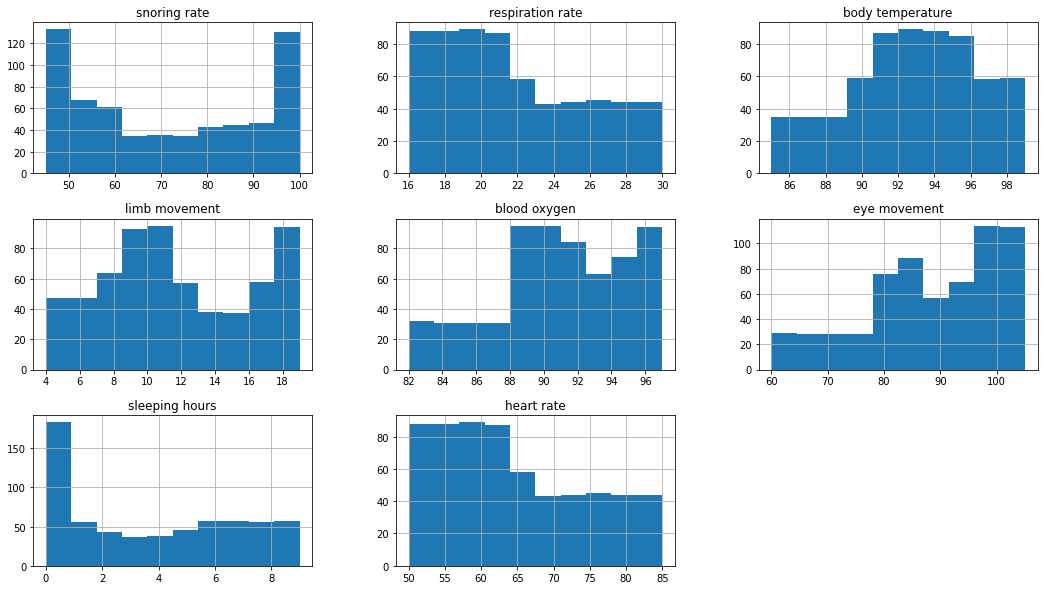

In [8]:
histplot = df.hist(column=['snoring rate', 'respiration rate', 'body temperature', 'limb movement',
       'blood oxygen', 'eye movement', 'sleeping hours', 'heart rate'],figsize=(18,10))

From this we can see we dont have any outliers in the data

### Duplicates

In [9]:
df.duplicated().sum()

0

We dont have any duplicates in the data

# EDA 

## Feature Scaling

In [10]:
#importing library 
from sklearn.preprocessing import MinMaxScaler
#Defining varible
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(df[['snoring rate', 'respiration rate', 'body temperature', 'limb movement',
       'blood oxygen', 'eye movement', 'sleeping hours','heart rate']])
print(scaled)

[[0.88727273 0.69142857 0.48857143 ... 0.88       0.20444444 0.69142857]
 [0.848      0.65028571 0.468      ... 0.864      0.17244444 0.65028571]
 [0.27272727 0.28571429 0.78571429 ... 0.55555556 0.77777778 0.28571429]
 ...
 [0.95461818 0.82171429 0.13428571 ... 0.93066667 0.         0.82171429]
 [0.248      0.26628571 0.76628571 ... 0.54044444 0.74755556 0.26628571]
 [0.52581818 0.38514286 0.59942857 ... 0.71022222 0.45422222 0.38514286]]


In [11]:
newdf = pd.DataFrame(scaled, columns =['snoring rate', 'respiration rate', 'body temperature', 'limb movement',
       'blood oxygen', 'eye movement', 'sleeping hours', 'heart rate'])

In [12]:
newdf.head()

,snoring rate,respiration rate,body temperature,limb movement,blood oxygen,eye movement,sleeping hours,heart rate
0,0.887273,0.691429,0.488571,0.840000,0.522667,0.880000,0.204444,0.691429
1,0.848000,0.650286,0.468000,0.792000,0.503467,0.864000,0.172444,0.650286
2,0.272727,0.285714,0.785714,0.400000,0.866667,0.555556,0.777778,0.285714
3,0.741091,0.538286,0.412000,0.661333,0.451200,0.820444,0.085333,0.538286
4,0.056727,0.089143,0.919429,0.166400,0.949867,0.277333,0.916444,0.089143


In [13]:
newdf['stress level']=df['stress level']

In [14]:
newdf

,snoring rate,respiration rate,body temperature,limb movement,blood oxygen,eye movement,sleeping hours,heart rate,stress level
0,0.887273,0.691429,0.488571,0.840000,0.522667,0.880000,0.204444,0.691429,3
1,0.848000,0.650286,0.468000,0.792000,0.503467,0.864000,0.172444,0.650286,3
2,0.272727,0.285714,0.785714,0.400000,0.866667,0.555556,0.777778,0.285714,1
3,0.741091,0.538286,0.412000,0.661333,0.451200,0.820444,0.085333,0.538286,3
4,0.056727,0.089143,0.919429,0.166400,0.949867,0.277333,0.916444,0.089143,0
...,...,...,...,...,...,...,...,...,...
625,0.447273,0.354286,0.568571,0.464000,0.597333,0.662222,0.382222,0.354286,2
626,0.062545,0.098286,0.933143,0.183467,0.958400,0.305778,0.930667,0.098286,0
627,0.954618,0.821714,0.134286,0.916800,0.150400,0.930667,0.000000,0.821714,4
628,0.248000,0.266286,0.766286,0.381867,0.839467,0.540444,0.747556,0.266286,1


### Statistical Summary (post-normalization)

In [15]:
newdf.describe()

,snoring rate,respiration rate,body temperature,limb movement,blood oxygen,eye movement,sleeping hours,heart rate,stress level
count,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000
mean,0.483636,0.414286,0.557143,0.513333,0.593333,0.633333,0.411111,0.414286,2.000000
std,0.352233,0.283294,0.252121,0.286642,0.260166,0.264305,0.339397,0.283294,1.415337
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.136364,0.178571,0.392857,0.300000,0.433333,0.472222,0.055556,0.178571,1.000000
50%,0.454545,0.357143,0.571429,0.466667,0.600000,0.666667,0.388889,0.357143,2.000000
75%,0.840909,0.642857,0.750000,0.783333,0.816667,0.861111,0.722222,0.642857,3.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [16]:
newdf['stress level'].value_counts().sort_values()

3    126
1    126
0    126
2    126
4    126
Name: stress level, dtype: int64

The data is equally distributed among all the stress levels

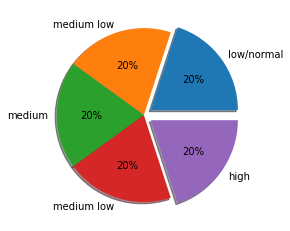

In [17]:
#plotting a pie chart to show the distribution of data
label = ['low/normal' , 'medium low' , 'medium' ,'medium low','high']
ex=[0.1,0,0,0,0.1]
plt.pie(newdf['stress level'].value_counts(),labels=label,autopct='%.0f%%',explode=ex,shadow=True)
plt.show()

### Checking for correlation

In [18]:
newdf.corrwith(newdf['stress level'], method = 'pearson')

snoring rate        0.975322
respiration rate    0.963516
body temperature   -0.962354
limb movement       0.971071
blood oxygen       -0.961092
eye movement        0.951988
sleeping hours     -0.973036
heart rate          0.963516
stress level        1.000000
dtype: float64

<AxesSubplot:>

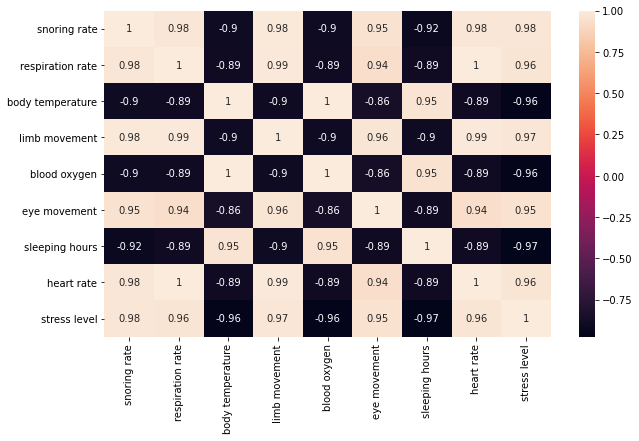

In [33]:
plt.figure(figsize=(10,6))
sns.heatmap(newdf.corr(),annot=True)

All the features have high correlation with the target variable.

# Model Training

### Importing the Models

In [20]:
from sklearn.model_selection import train_test_split as tts
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as kn
from sklearn.model_selection import GridSearchCV as gscv
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score as cvs

### Splitting the Dataset

In [21]:
#splitting among features and target
X = newdf[['snoring rate', 'respiration rate', 'body temperature', 'limb movement',
       'blood oxygen', 'eye movement', 'sleeping hours', 'heart rate']]
y = newdf['stress level']
#splitting among test and train dataset
x_train, x_test, y_train, y_test= tts(X, y, test_size=0.4)
print('Dimensions of train dataset:',x_train.shape)
print('Dimensions of test dataset:',x_test.shape)

#defining dictionaries for storing results of different models and comparing 
sc = {}
rn = {}

Dimensions of train dataset: (378, 8)
Dimensions of test dataset: (252, 8)


## Logistic Regression

In [22]:
lrr=LogisticRegression()
lrr.fit(x_train,y_train)
lrr_pred=lrr.predict(x_test)
print('accuracy_score:',metrics.accuracy_score(y_test, lrr_pred))

r=cvs(lrr, X, y, cv=10, scoring='accuracy').mean()
sc['Logistic Regression']=r
rn['Logistic Regression']=np.array(np.unique(lrr_pred, return_counts=True))
print('cross val score:',r)

accuracy_score: 1.0
cross val score: 1.0


## K-Neighbors Classification

In [23]:
knn=kn(n_neighbors=5)
kr=range(1, 35)
weight_options=['uniform', 'distance']
param_grid=dict(n_neighbors=kr, weights=weight_options)
print(param_grid)
grid=gscv(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(X, y)

sc['K-Nearest Neighbors']=grid.best_score_
print("grid.best_score_ :",grid.best_score_,
      '\ngrid.best_params_ :',grid.best_params_)

{'n_neighbors': range(1, 35), 'weights': ['uniform', 'distance']}
grid.best_score_ : 1.0 
grid.best_params_ : {'n_neighbors': 1, 'weights': 'uniform'}


## Naive Bayes

In [24]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)
nb_pred=nb.predict(x_test)
print("accuracy_score",metrics.accuracy_score(y_test, nb_pred))
sc['Naive Bayes']=metrics.accuracy_score(y_test, nb_pred)
rn['Naive Bayes']=np.array(np.unique(nb_pred, return_counts=True))

accuracy_score 1.0


## XGB Classifier

In [25]:
from xgboost import XGBClassifier
XGB = XGBClassifier()
XGB.fit(x_train,y_train,eval_metric='auc')
xgb_pred=XGB.predict(x_test)
print("accuracy_score",metrics.accuracy_score(y_test, xgb_pred))
sc['XGB Classifier']=metrics.accuracy_score(y_test, xgb_pred)
rn['XGB Classifier']=np.array(np.unique(xgb_pred, return_counts=True))

accuracy_score 0.9920634920634921


c:\users\dhrub\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


## Decision Trees Classifier

In [26]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=20)
dtree.fit(x_train,y_train)
dtree_pred=dtree.predict(x_test)
print("accuracy_score",metrics.accuracy_score(y_test, dtree_pred))
sc['Decision Trees']=metrics.accuracy_score(y_test, dtree_pred)
rn['Decision Trees']=np.array(np.unique(dtree_pred, return_counts=True))

accuracy_score 0.9841269841269841


## Random Forest Classifier

In [27]:
from sklearn.ensemble import RandomForestClassifier
rfm = RandomForestClassifier(n_estimators = 50)
rfm.fit(x_train,y_train)
rfm_pred=rfm.predict(x_test)
print("accuracy_score",metrics.accuracy_score(y_test, rfm_pred))
sc['Random Forest']=metrics.accuracy_score(y_test, rfm_pred)
rn['Random Forest']=np.array(np.unique(rfm_pred, return_counts=True))

accuracy_score 0.9920634920634921


In [28]:
sc

{'Logistic Regression': 1.0,
 'K-Nearest Neighbors': 1.0,
 'Naive Bayes': 1.0,
 'XGB Classifier': 0.9920634920634921,
 'Decision Trees': 0.9841269841269841,
 'Random Forest': 0.9920634920634921}

In [29]:
rn

{'Logistic Regression': array([[ 0,  1,  2,  3,  4],
        [61, 41, 54, 48, 48]], dtype=int64),
 'Naive Bayes': array([[ 0,  1,  2,  3,  4],
        [61, 41, 54, 48, 48]], dtype=int64),
 'XGB Classifier': array([[ 0,  1,  2,  3,  4],
        [62, 40, 55, 47, 48]], dtype=int64),
 'Decision Trees': array([[ 0,  1,  2,  3,  4],
        [60, 40, 56, 47, 49]], dtype=int64),
 'Random Forest': array([[ 0,  1,  2,  3,  4],
        [60, 41, 55, 48, 48]], dtype=int64)}